****Importing Libraries****

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

****Preparing Dataset****

In [ ]:
df = pd.read_csv("/content/imdb_top_1000.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
print("The shape of the dataset is:")
df.shape

The shape of the dataset is:


(1000, 16)

In [ ]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [ ]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


****Checking for Null-Values****

In [ ]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
# dealing with null values in certificate column
# replacing the null values with unrated
df['Certificate'] = df['Certificate'].fillna('Unrated')
df['Certificate'].value_counts()

U           234
A           197
UA          175
R           146
Unrated     102
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
U/A           1
Name: Certificate, dtype: int64

In [ ]:
# dealing with null values in Meta_score column
# replcing null values with average
meta_score_mean = df['Meta_score'].mean()
df['Meta_score'] = df['Meta_score'].fillna(meta_score_mean)

In [ ]:
# dealing with null values in GROSS column
# replacing na column with zero

df['Gross'] = df['Gross'].str.replace(',', '', regex=True).astype(float)
df['Gross'].fillna(0, inplace=True)


In [ ]:
# calculating mean excluding zero
gross_mean = df[df['Gross'] != 0]['Gross'].mean()

# replacing zero with gross mean
df['Gross'].replace(0, gross_mean, inplace=True)

df['Gross'] = df['Gross'].astype(int)

In [ ]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

****Checking for Duplicates****

In [ ]:
df.duplicated().sum()

0

****Drop un-necessory columns****

In [ ]:
df.drop(['Poster_Link', 'Overview'], axis=1, inplace=True)
df.sample(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
790,Black Hawk Down,2001,A,144 min,"Drama, History, War",7.7,74.0,Ridley Scott,Josh Hartnett,Ewan McGregor,Tom Sizemore,Eric Bana,364254,108638745
732,Me and Earl and the Dying Girl,2015,PG-13,105 min,"Comedy, Drama",7.7,74.0,Alfonso Gomez-Rejon,Thomas Mann,RJ Cyler,Olivia Cooke,Nick Offerman,123210,6743776
358,Persepolis,2007,PG-13,96 min,"Animation, Biography, Drama",8.0,90.0,Vincent Paronnaud,Marjane Satrapi,Chiara Mastroianni,Catherine Deneuve,Gena Rowlands,88656,4445756
439,Cat on a Hot Tin Roof,1958,A,108 min,Drama,8.0,84.0,Richard Brooks,Elizabeth Taylor,Paul Newman,Burl Ives,Jack Carson,45062,17570324
436,Rio Bravo,1959,Passed,141 min,"Action, Drama, Western",8.0,93.0,Howard Hawks,John Wayne,Dean Martin,Ricky Nelson,Angie Dickinson,56305,12535000


****Correlation****

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-17-f471181e404f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.253903,0.494979,0.089881
Meta_score,0.253903,1.000000,-0.017739,-0.030905
No_of_Votes,0.494979,-0.017739,1.000000,0.549582
Gross,0.089881,-0.030905,0.549582,1.000000


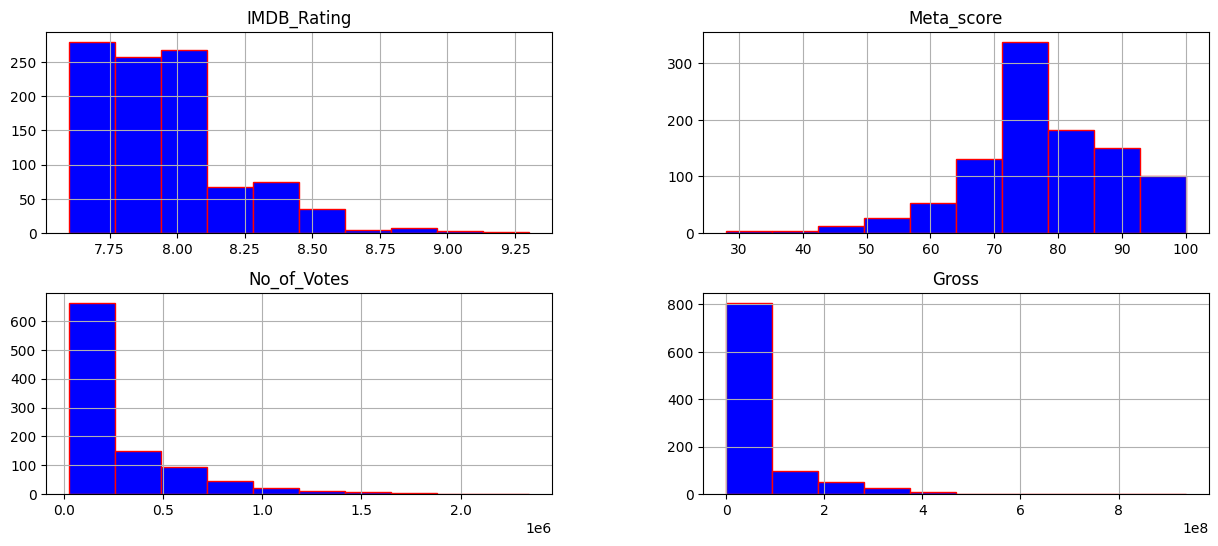

In [ ]:
numerical_attributes = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
df[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 2));

****Top voted movies****

Text(0.5, 1.0, 'Top Rated Movies')

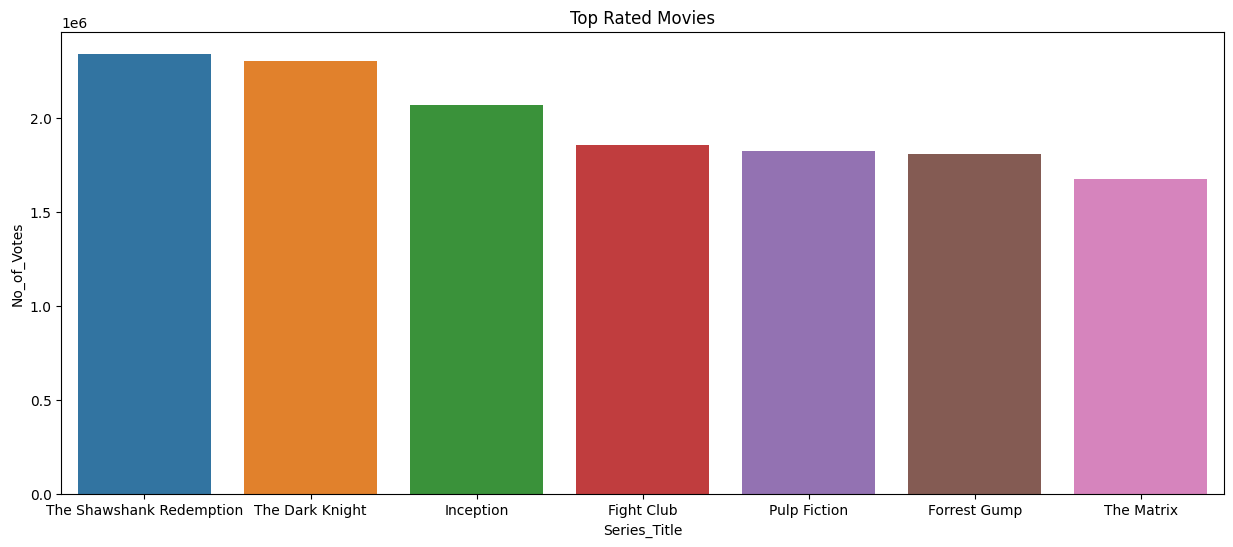

In [ ]:
top_voted = df.sort_values(by = 'No_of_Votes', ascending = False)
plt.figure(figsize = (15,6))
sns.barplot(x = top_voted['Series_Title'][:7], y= top_voted['No_of_Votes'][:7])
plt.title('Top Rated Movies')

****Top-Rated Movies****

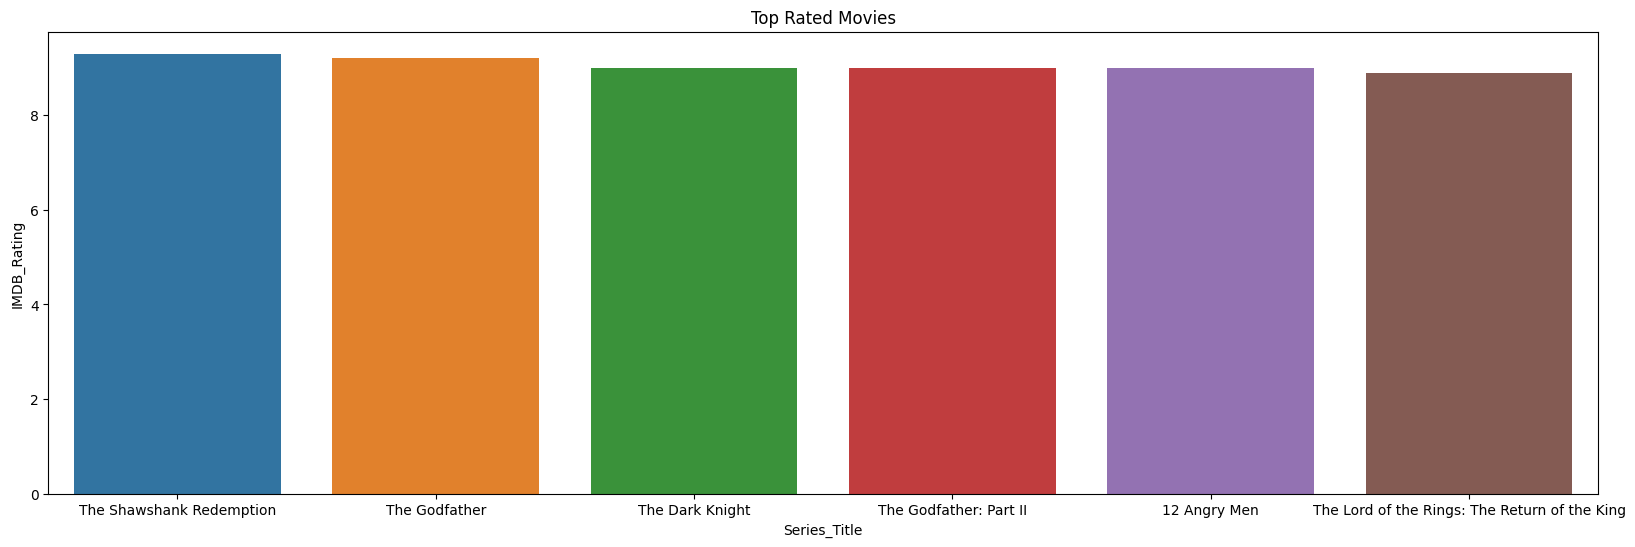

In [ ]:
top_rated = df.sort_values(by = 'IMDB_Rating', ascending = False)
plt.figure(figsize = (20,6))
sns.barplot(x = top_rated['Series_Title'][:6], y= top_rated['IMDB_Rating'][:7])
plt.title('Top Rated Movies')
plt.show()

****Most Common Genre****

In [ ]:
all_genre = df['Genre']
genres_series = pd.Series(all_genre)

genre_counts = genres_series.value_counts()


print("Most Common Genres:")
print(genre_counts.head(10))

Most Common Genres:
Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: Genre, dtype: int64


****High rated directors****

In [ ]:
director_rating = df.groupby('Director')['IMDB_Rating'].agg(['mean', 'count'])
director_rating.columns = ['Mean_Rating', 'Movie_Count']
director_rating.sort_values(by = 'Mean_Rating',ascending = False)

,Mean_Rating,Movie_Count
Director,,
Frank Darabont,8.95,2
Irvin Kershner,8.70,1
Lana Wachowski,8.70,1
George Lucas,8.60,1
Roberto Benigni,8.60,1
...,...,...
Eric Bress,7.60,1
Ted Demme,7.60,1
Neil Burger,7.60,1


****Relation Between movie duration and rating****

In [ ]:
# removing min from each row of data and converting its type to integer
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross              int64
dtype: object

In [ ]:
bins = np.linspace(min(df["Runtime"]), max(df["Runtime"]), 4)
bins

array([ 45., 137., 229., 321.])

In [ ]:
group_names = ['Short', 'Medium', 'Long']
df['Runtime-binned'] = pd.cut(df['Runtime'], bins, labels=group_names, include_lowest=True )
df[['Runtime','Runtime-binned']].head(20)

,Runtime,Runtime-binned
0,142,Medium
1,175,Medium
2,152,Medium
3,202,Medium
4,96,Short
5,201,Medium
6,154,Medium
7,195,Medium
8,148,Medium
9,139,Medium


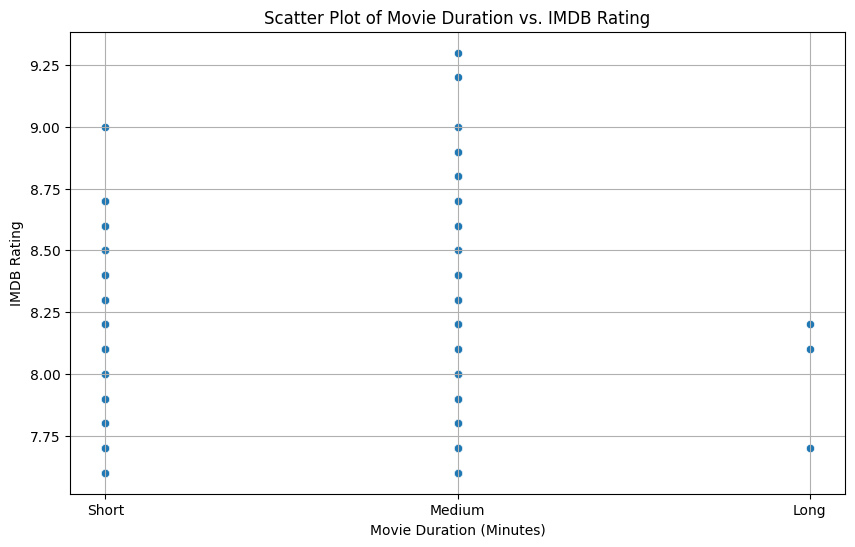

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = df['Runtime-binned'], y = df['IMDB_Rating'])
plt.xlabel('Movie Duration (Minutes)')
plt.ylabel('IMDB Rating')
plt.title('Scatter Plot of Movie Duration vs. IMDB Rating')
plt.grid(True)
plt.show()

****Certificate Rating****

In [ ]:
certificate_rating = df.groupby('Certificate')['IMDB_Rating'].agg(['count', 'mean'])
certificate_rating.columns = ['count', 'rating']
certificate_rating.sort_values(by = 'rating', ascending = False)

,count,rating
Certificate,,
TV-14,1,8.300000
16,1,8.100000
TV-MA,1,8.100000
Passed,34,8.020588
G,12,8.000000
A,197,7.998985
U,234,7.976923
UA,175,7.957143
Approved,11,7.945455


Text(0.5, 1.0, 'Certificate count')

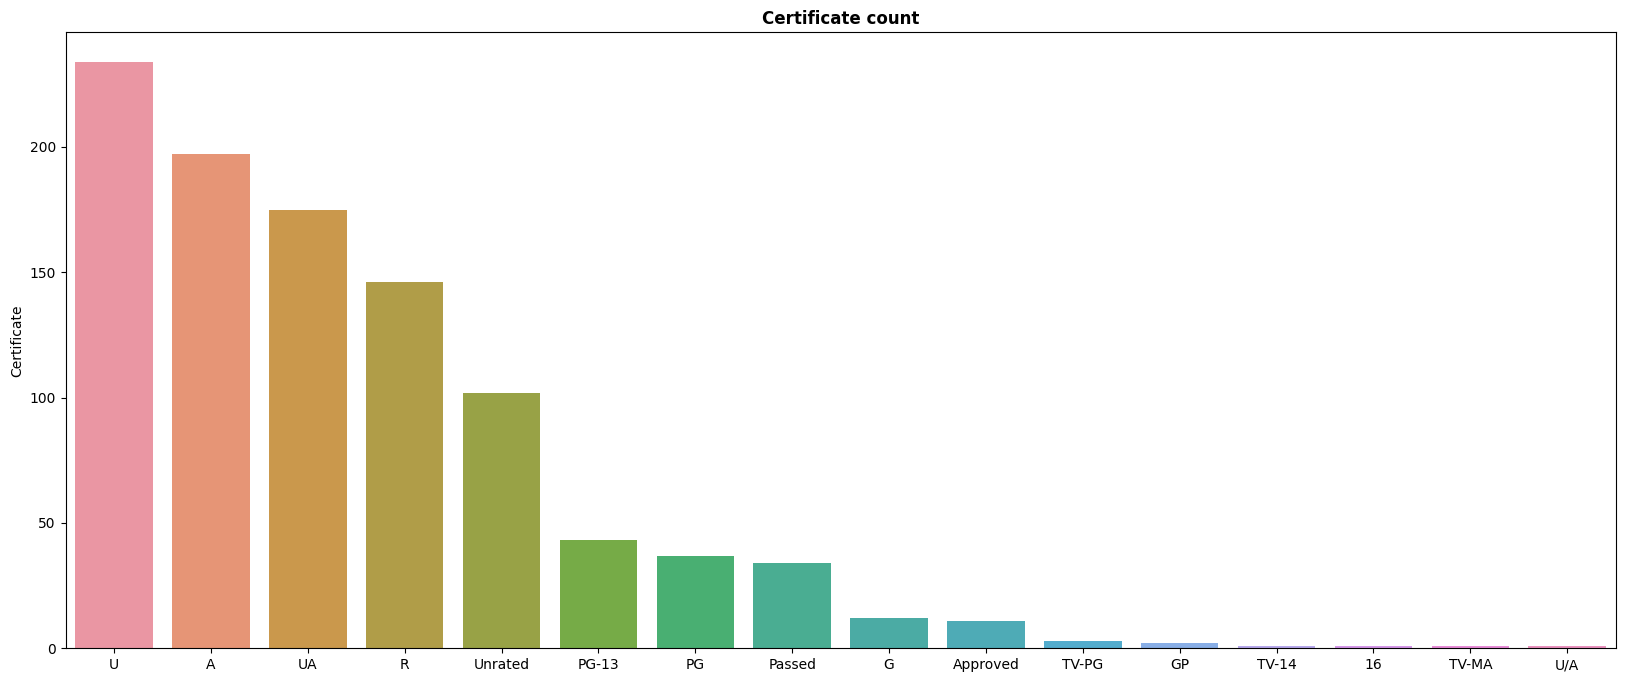

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(x = df['Certificate'].value_counts().index, y = df['Certificate'].value_counts())
plt.title("Certificate count", weight = 'bold')

****Gross of top voted movies****

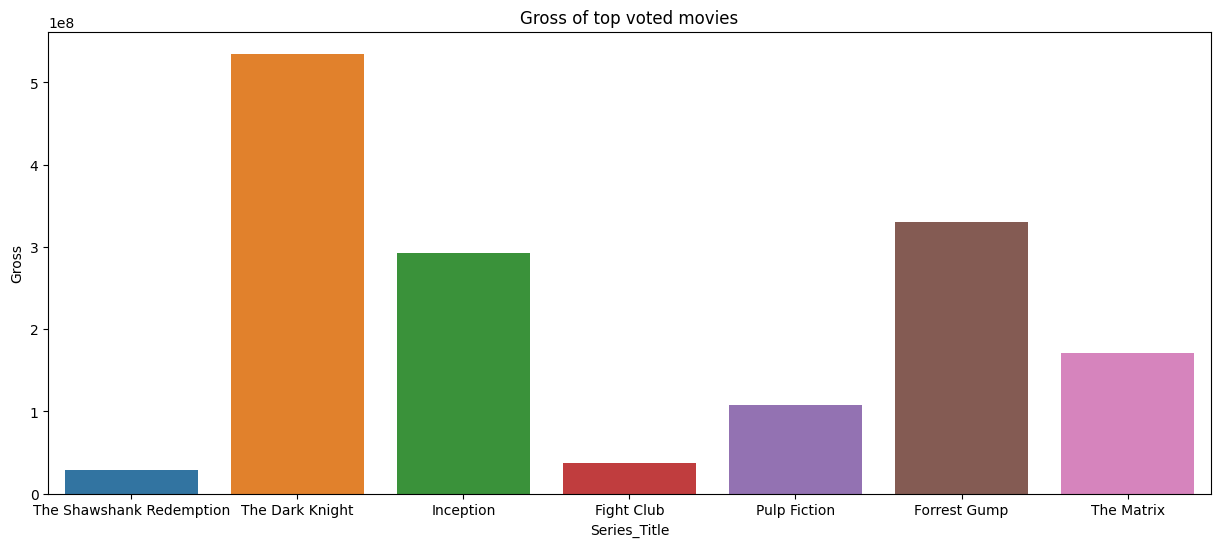

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x = top_voted['Series_Title'][:7], y = top_voted['Gross'][:7])
plt.title("Gross of top voted movies")
plt.show()

****Highest earning movies****

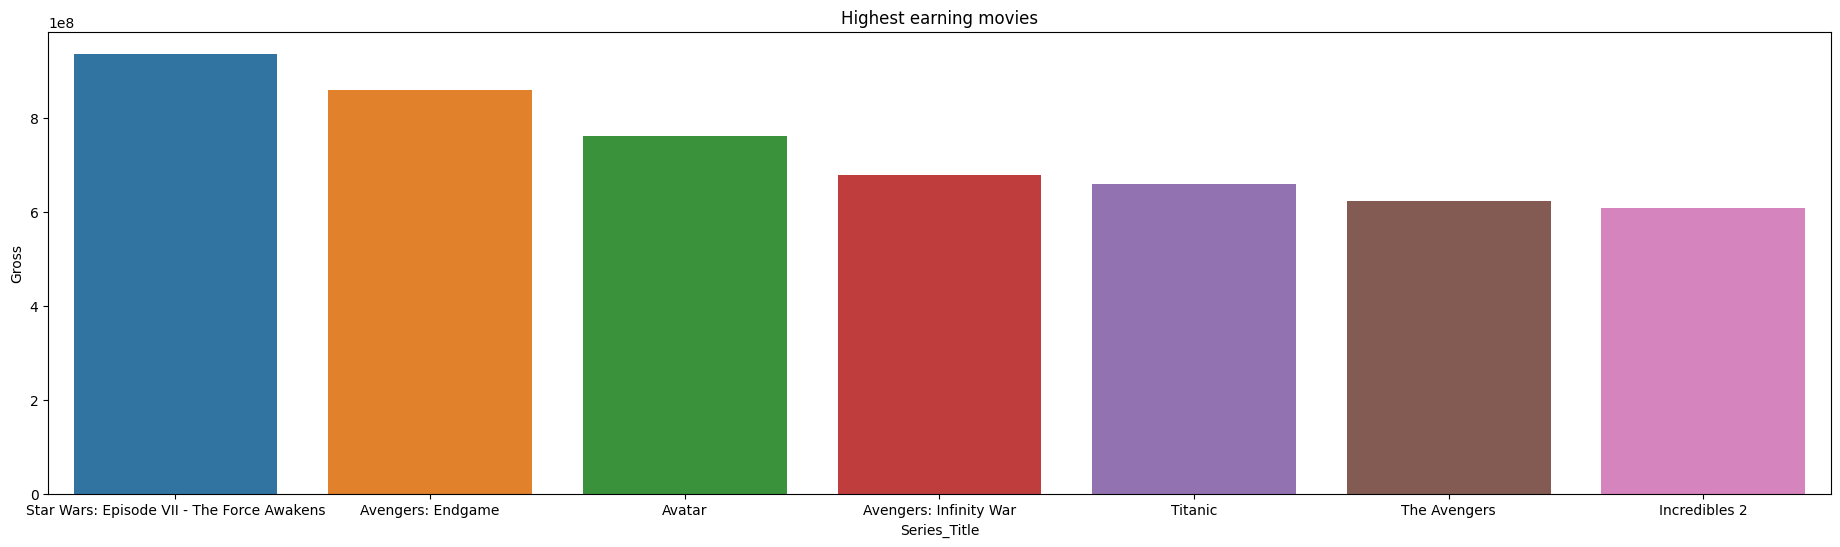

In [ ]:
highest_earning = df.sort_values('Gross', ascending = False)
plt.figure(figsize = (23,6))
sns.barplot(x = highest_earning['Series_Title'][:7], y = highest_earning['Gross'][:7])
plt.title("Highest earning movies")
plt.show()

****Maximum movies released in****

<Axes: ylabel='Released_Year'>

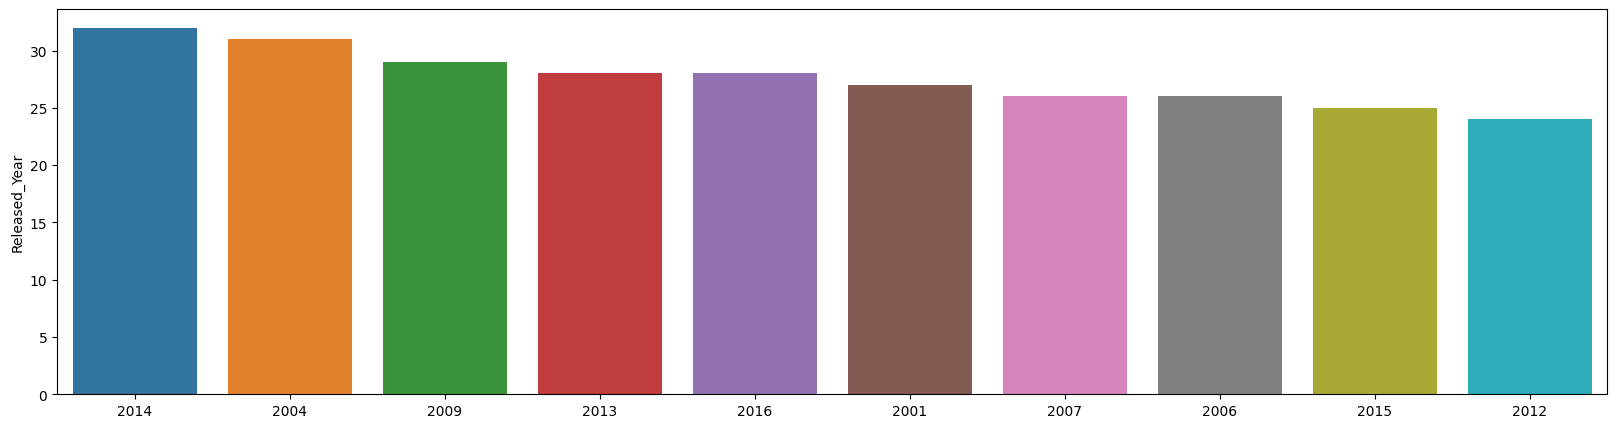

In [ ]:
movie_released = df.sort_values('Released_Year', ascending = False)
plt.figure(figsize = (20,5))
sns.barplot(x=df['Released_Year'].value_counts()[:10].index,y=df['Released_Year'].value_counts()[:10])

****Top-10 Genres****

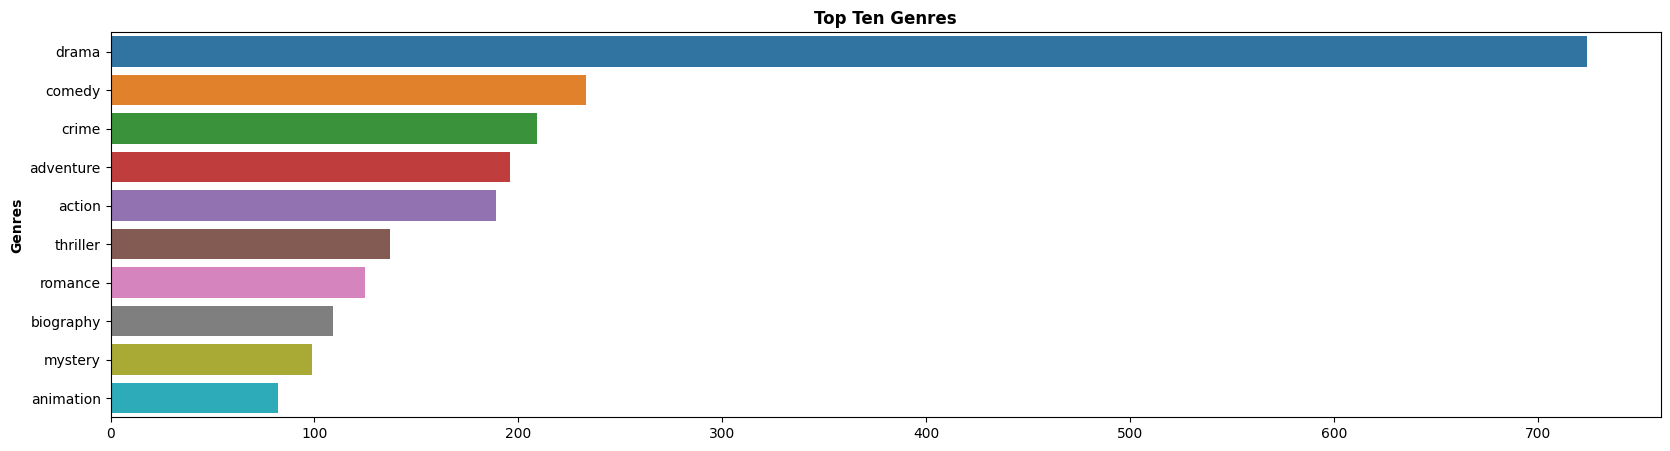

In [ ]:
from collections import Counter
genre=[]
for x in df['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count=Counter(genre)
count=count.most_common()[:10]
x,y=map(list,zip(*count))

fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x = y,y = x)
g.set_ylabel("Genres", weight = "bold")
g.set_title("Top Ten Genres", weight = "bold")
plt.show()

****IMDB Rating distribution****

<Figure size 2000x500 with 0 Axes>

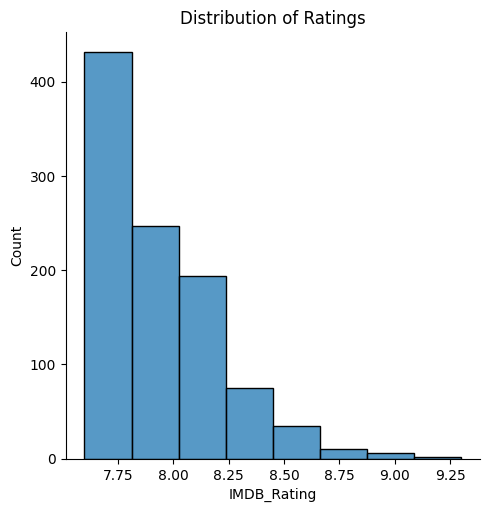

In [ ]:
plt.figure(figsize=(20,5))
sns.displot(df['IMDB_Rating'],bins=8)
plt.title("Distribution of Ratings")
plt.show()

****Stars with most Occurences in movies****

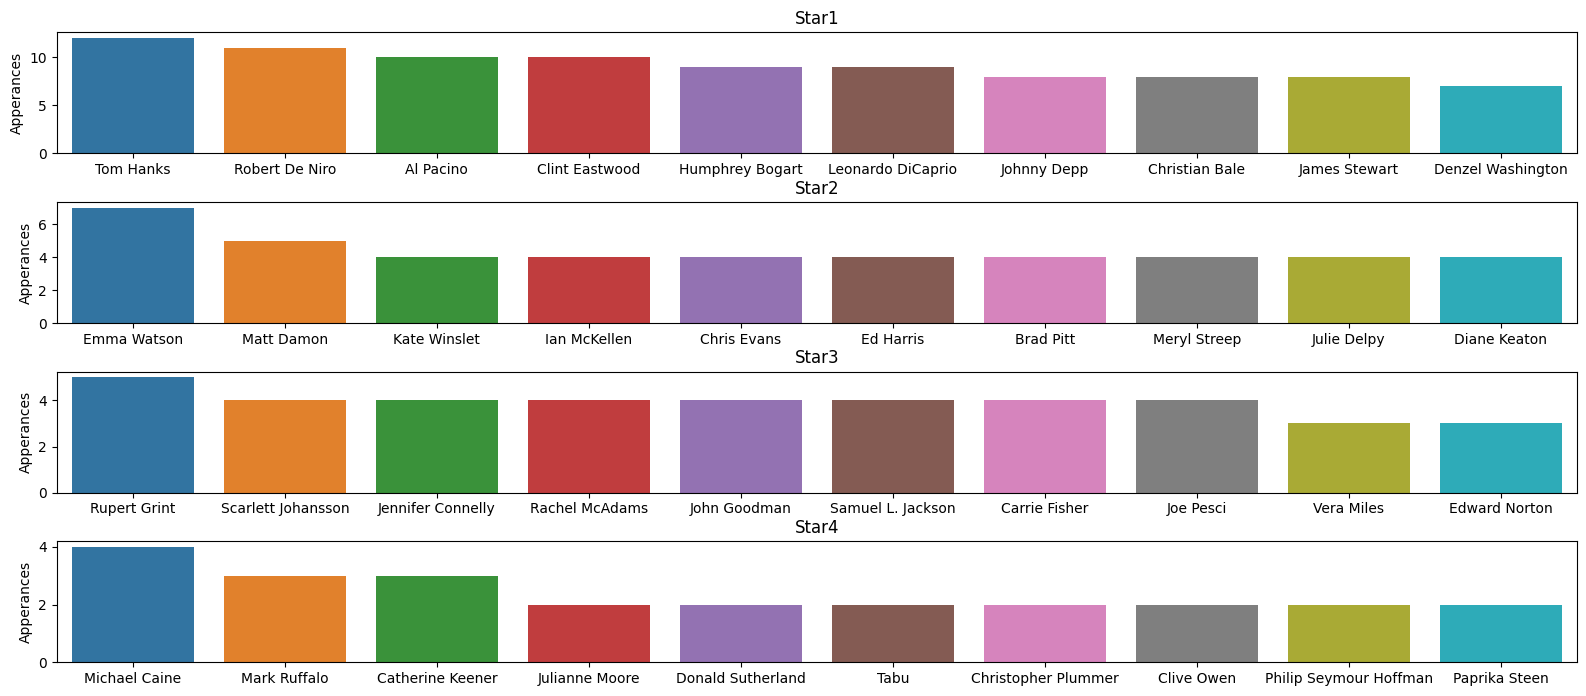

In [ ]:
plt.figure(figsize = (19,7))

# for star 1
plt.subplot(4,1,1)
sns.barplot(x=df['Star1'].value_counts()[:10].index,y=df['Star1'].value_counts()[:10])
plt.ylabel('Apperances')
plt.title("Star1")


# for star 2
plt.subplot(4,1,2)
sns.barplot(x=df['Star2'].value_counts()[:10].index,y=df['Star2'].value_counts()[:10])
plt.ylabel('Apperances')
plt.title("Star2")

# for star3
plt.subplot(4,1,3)
sns.barplot(x=df['Star3'].value_counts()[:10].index,y=df['Star3'].value_counts()[:10])
plt.ylabel('Apperances')
plt.title("Star3")

# for star 4
plt.subplot(4,1,4)
sns.barplot(x=df['Star4'].value_counts()[:10].index,y=df['Star4'].value_counts()[:10])
plt.ylabel('Apperances')
plt.title("Star4")

plt.subplots_adjust(left=0.1,
                    bottom=0,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

****Top-Rated Actors****

<ipython-input-35-f40ad2cadad4>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s = df.groupby([x]).sum()
<ipython-input-35-f40ad2cadad4>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s = df.groupby([x]).sum()
<ipython-input-35-f40ad2cadad4>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s = df.groupby([x]).sum()
<ipython-input-35-f40ad2cadad4>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy

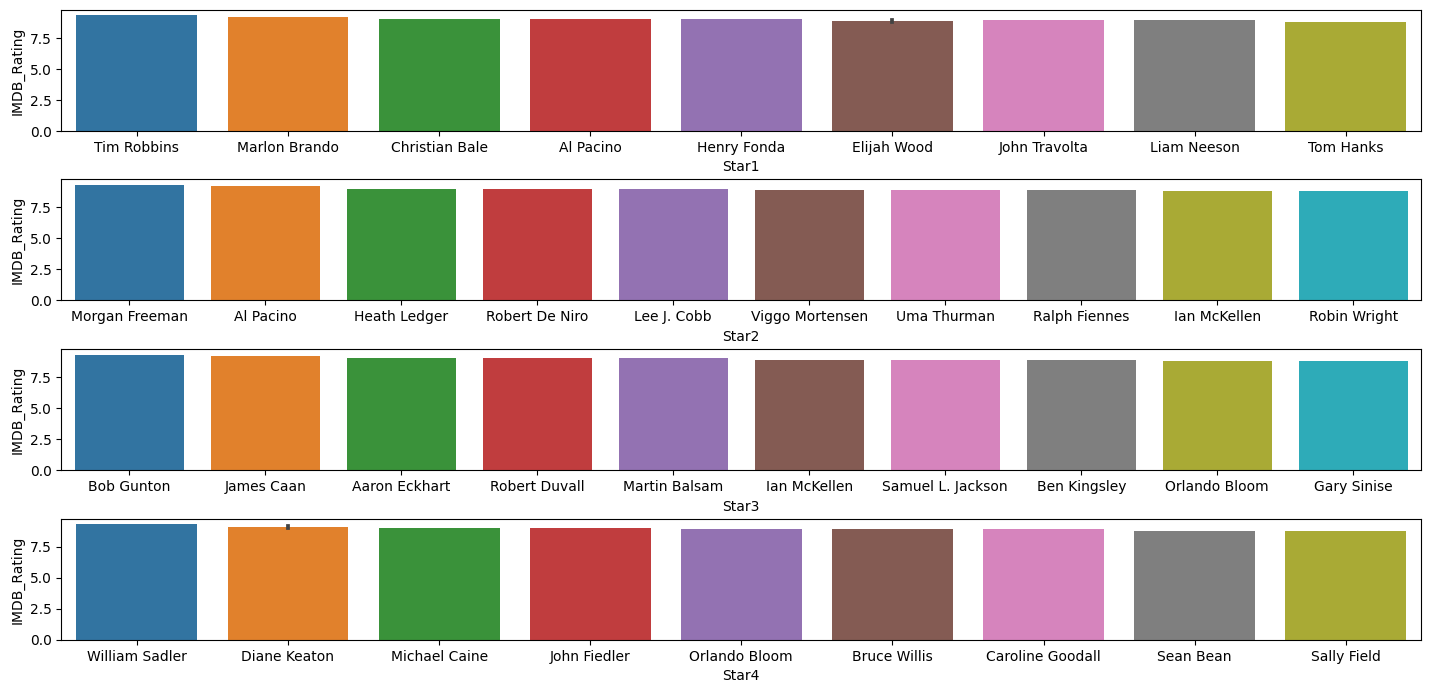

In [ ]:
plt.figure(figsize = (17,7))
stars=['Star1','Star2','Star3','Star4']
h = 1
for x in stars:
  s = df.groupby([x]).sum()
  d = df.sort_values(by = 'IMDB_Rating', ascending = False)[:10]
  plt.subplot(4,1,h)
  sns.barplot(x = d[x], y = d['IMDB_Rating'])
  #plt.title ("STAR {}".format(h))
  plt.subplots_adjust(left=0.1, bottom=0, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
  h = h+1

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25)

In [ ]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime-binned
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,Medium
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,Medium
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,Medium
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,Medium
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,Short
